# Tratamiento inicial de datos del primer dataset
En este notebook se hará un preprocesamiento de los datos, eliminando las stopwords, palabras que solo se repiten una vez. También reduciremos las palabras derivadas a la raíz (stemming).

Guardaremos el nuevo dataset con los datos limpios para evitar realizar el preprocesamiento de nuevo y teniendo mejor dividido cada apartado de la práctica.

In [1]:
import numpy as np
import pandas as pd
import os
import io
import matplotlib.pyplot as plt

# Permitir ver columnas completas
pd.set_option('display.max_colwidth', None)

In [2]:
# Función para cargar dataframe
def load_data(ruta, nombre):
    path = os.path.join(ruta, nombre)    
    return pd.read_csv(path, encoding="ISO-8859-1")

# Análisis exploratorio

In [3]:
# Carga de datos
df = load_data('data', 'train_sentiment.csv')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4,5,0,i think mi bf is cheating on me!!! T_T


Tamaño del dataset

In [4]:
df.shape

(99989, 3)

Información sobre los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


Vemos que en ninguna columna tenemos valores nulos

Análisis de las columnas numéricas

In [6]:
df.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


La columna ItemID no nos interesa porque parece un identificador de la fila, pero si nos fijamos en la columna Sentiment, vemos que el valor máximo es 1 y que el mínimo es 0, parece una variable categórica ya convertida a número. 

Elimino la columna ItemID:

In [7]:
df.drop(['ItemID'], axis=1, inplace=True)

## Analizamos la distribución de valores en la variable Sentiment:

In [8]:
print('Sentiment:')
print(df['Sentiment'].value_counts())

Sentiment:
1    56457
0    43532
Name: Sentiment, dtype: int64


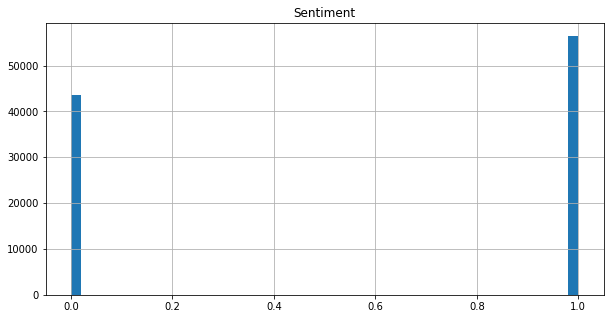

In [9]:
# Histograma
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,5))
plt.show()

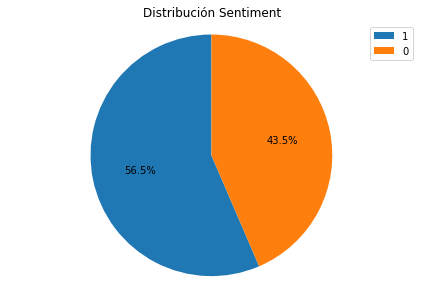

In [10]:
labels = '1', '0'
sizes = df['Sentiment'].value_counts()

fig1, ax1 = plt.subplots()

patches, texts, junk = ax1.pie(sizes, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.legend(patches, labels, loc="best")
ax1.axis('equal')  
plt.tight_layout()
plt.title('Distribución Sentiment', fontsize=12)
plt.show()

# Tratamiento de datos
Antes de analizar los Tweets, realizaré actividades de pre procesamiento como las siguientes:

- **Eliminar stopwords** usando Nltk que es una librería de procesamiento de lenguaje natural
- **Lematización** para llevar las palabras a su forma base considerando en análisis morfológico. Se usará Nltk
- NO usaré **Stemming** para llevar las palabras a su forma base ya que la lemmatización es más avanzada.
- Borraré las url, menciones, hashtags etc
- Se borrarán las palabras que solo existen una vez, ya que estas harían fallar el algoritmo ya que al hacer la división caerían o en Test o en Train

In [11]:
df_pandas = df

#change tweets into lowercase
df_pandas['SentimentText'] = df_pandas['SentimentText'].str.lower()

#Removing RT retweet term
df_pandas['SentimentText'] = df_pandas['SentimentText'].str.replace('rt', '')

#Removing usernames
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace(r'@\w+', '', regex=True)

#Removing url links
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace(r'http\S+', '', regex=True)
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace(r'www.[^ ]+', '', regex=True)

#remove next line \n
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace('\n',' ', regex=True)

#remove numbers
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace(r'[0-9]+', '', regex=True)

#removing special characters
df_pandas['SentimentText'] = df_pandas['SentimentText'].replace(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', regex=True)

# Removing tweet topic
df_pandas['SentimentText'] = df_pandas['SentimentText'].str.replace('haze', '')

print(df_pandas)

Sentiment  \
0              0   
1              0   
2              1   
3              0   
4              0   
...          ...   
99984          0   
99985          1   
99986          0   
99987          1   
99988          1   

                                                                                                                       SentimentText  
0                                                                                                        is so sad for my apl friend  
1                                                                                                      i missed the new moon trailer  
2                                                                                                                 omg its already  o  
3                          omgaga im sooo  im gunna cry i've been at this dentist since  i was suposed  just get a crown put on mins  
4                                                                                          

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import (stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asens\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stop_words_eng = stopwords.words('english')
print(stop_words_eng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Vemos que algunas stopwords no podrían usarse en un análisis de sentimiento porque cambiarían el significado de los tweets, así que de la lista de stop words, eliminamos las que no interesen.

In [14]:
listaBorrar = {'no', 'but', 'against', 'again', 'nor', 'not', "don't", 'don', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

stop_words_eng = [elem for elem in stop_words_eng if elem not in listaBorrar]
print(stop_words_eng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 

In [15]:
df_pandas['SentimentText'] = df_pandas['SentimentText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_eng)]))

print(df_pandas)

Sentiment  \
0              0   
1              0   
2              1   
3              0   
4              0   
...          ...   
99984          0   
99985          1   
99986          0   
99987          1   
99988          1   

                                                                   SentimentText  
0                                                                 sad apl friend  
1                                                        missed new moon trailer  
2                                                                    omg already  
3      omgaga im sooo im gunna cry i've dentist since suposed get crown put mins  
4                                                        think mi bf cheating tt  
...                                                                          ...  
99984                      seems like repeating problem hope able find something  
99985              arrrr replied different tweets time i'll see duno hell kateyy  
99986              

# Visualización palabras negativas y positivas
Una vez hecho el tratamiento de datos, mostramos dos nubes de etiquetas con las palabras más usadas de ambas categorías.

In [16]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
class wordcloud():
    def wordclouddraw(self,df_pandas,sent):
        if sent == 'positive':
            text_filtered_sentiment = df_pandas['Sentiment'] == 1
            text_filtered_sentiment2 = df_pandas[text_filtered_sentiment]
            text = text_filtered_sentiment2.SentimentText.to_string(index=False, header=False)
            filename = "/HAZE_pos_tweets_spark.png"
        elif sent == 'negative':
            text_filtered_sentiment = df_pandas['Sentiment'] == 0
            text_filtered_sentiment2 = df_pandas[text_filtered_sentiment]
            text = text_filtered_sentiment2.SentimentText.to_string(index=False, header=False)
            filename = "/HAZE_neg_tweets_spark.png"
        else:
            # Mostrar ambos
            text = df_pandas.SentimentText.to_string( index=False, header=False)
            filename = "/HAZE_all_tweets_spark.png"

        file = os.getcwd()

        wordcloud = WordCloud(
            width = 1500,
            height = 1000,
            background_color = 'black',
            stopwords=['haze']
        ).generate(text)

        fig = plt.figure(
            figsize = (20, 10),
            facecolor = 'k',
            edgecolor = 'k')
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.tight_layout(pad=0)

        wcpath=file+filename

        wordcloud.to_file(wcpath)

## Sentimiento positivo

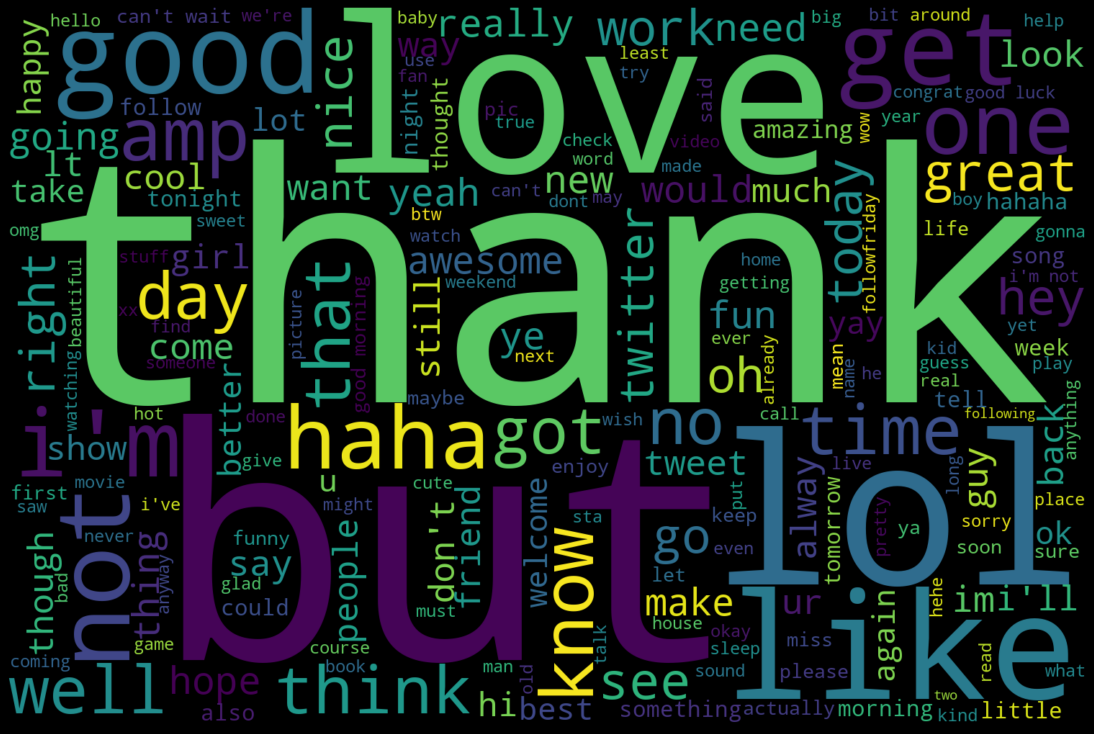

In [18]:
genwordcloud = wordcloud()
genwordcloud.wordclouddraw(df_pandas, sent="positive")

## Sentimiento negativo

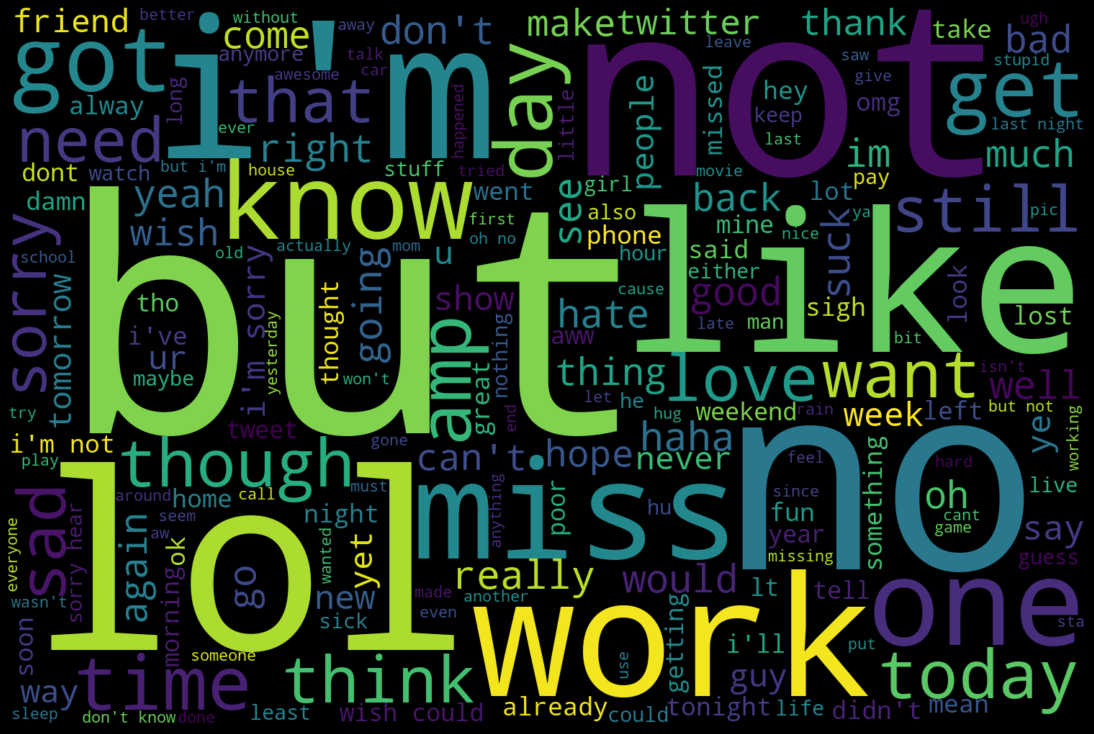

In [19]:
genwordcloud.wordclouddraw(df_pandas, sent="negative")